## Assignment 4.2: Clustering

In [2]:
# First I will import some needed libraries
import pandas as pd
from importlib import reload
import sys
import numpy as np
from imp import reload
import nltk
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
%matplotlib inline
import seaborn as sns 

## Importing the Data

In [82]:
# I will use pandas to pull the data to create a data frame to work from
als_data = pd.read_csv('als_data.csv')
als_data

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.00,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.00,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.00,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.00,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.00,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,2419,33,50.0,49.0,45.0,0.008772,-0.239501,35,32.5,30,...,136.0,0.014035,997136,7,5.0,5,0.003643,7.00,6.0,5.0
2219,2420,61,47.0,45.0,42.0,0.009074,-0.388711,31,26.0,17,...,141.0,0.009074,998047,5,4.0,3,0.003630,7.41,5.5,5.0
2220,2421,47,46.0,44.0,41.0,0.012111,-0.108631,26,23.0,20,...,135.0,0.013123,998773,5,4.0,4,0.001825,9.00,6.0,5.0
2221,2422,37,49.0,44.0,39.0,0.017857,-0.855880,34,29.5,21,...,136.0,0.007143,998908,8,4.5,2,0.010714,6.00,5.0,5.0


In [83]:
# First I will view the data type
als_data.dtypes

ID                   int64
Age_mean             int64
Albumin_max        float64
Albumin_median     float64
Albumin_min        float64
                    ...   
trunk_min            int64
trunk_range        float64
Urine.Ph_max       float64
Urine.Ph_median    float64
Urine.Ph_min       float64
Length: 101, dtype: object

As seen above the age mean and ID are integers while most others are seen as float64s.

In [84]:
# Next I will use describe to see the count, mean, std, min, and 
# more on the variables.
als_data.describe()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
count,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,...,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000
mean,1214.874944,54.550157,47.011134,43.952542,40.766347,0.013779,-0.728274,31.692308,27.104926,19.877193,...,136.755061,0.015000,498880.290148,6.203779,4.893387,2.955915,0.007136,6.820450,5.710639,5.183221
std,696.678300,11.396546,3.233980,2.654804,3.193087,0.009567,0.622329,5.314228,6.633643,8.583509,...,2.715247,0.009283,289923.528450,1.747660,2.146076,2.358095,0.004503,0.932141,0.625039,0.437222
min,1.000000,18.000000,37.000000,34.500000,24.000000,0.000000,-4.345238,11.000000,2.500000,0.000000,...,112.000000,0.000000,533.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000
25%,614.500000,47.000000,45.000000,42.000000,39.000000,0.009042,-1.086310,29.000000,23.000000,14.000000,...,135.000000,0.010582,240825.500000,5.000000,3.000000,1.000000,0.003643,6.000000,5.000000,5.000000
50%,1213.000000,55.000000,47.000000,44.000000,41.000000,0.012111,-0.620748,33.000000,28.000000,20.000000,...,137.000000,0.013123,496835.000000,7.000000,5.000000,3.000000,0.006920,7.000000,6.000000,5.000000
75%,1815.500000,63.000000,49.000000,46.000000,43.000000,0.015873,-0.283832,36.000000,32.000000,27.000000,...,138.000000,0.017278,750300.500000,8.000000,6.500000,5.000000,0.009639,7.000000,6.000000,5.000000
max,2424.000000,81.000000,70.300000,51.100000,49.000000,0.243902,1.207011,40.000000,40.000000,40.000000,...,145.000000,0.142857,999482.000000,8.000000,8.000000,8.000000,0.042017,9.000000,9.000000,8.000000


Above we see the mean age of a patient is 54 and half years old and the youngest is 18 years old while the max is 81 years old.

In [85]:
# Next I will check and what variables have NA values and 
# what percentage of the variable is NA
als_data.isnull().sum()/len(als_data)

ID                 0.0
Age_mean           0.0
Albumin_max        0.0
Albumin_median     0.0
Albumin_min        0.0
                  ... 
trunk_min          0.0
trunk_range        0.0
Urine.Ph_max       0.0
Urine.Ph_median    0.0
Urine.Ph_min       0.0
Length: 101, dtype: float64

In [86]:
list(als_data.columns)

['ID',
 'Age_mean',
 'Albumin_max',
 'Albumin_median',
 'Albumin_min',
 'Albumin_range',
 'ALSFRS_slope',
 'ALSFRS_Total_max',
 'ALSFRS_Total_median',
 'ALSFRS_Total_min',
 'ALSFRS_Total_range',
 'ALT.SGPT._max',
 'ALT.SGPT._median',
 'ALT.SGPT._min',
 'ALT.SGPT._range',
 'AST.SGOT._max',
 'AST.SGOT._median',
 'AST.SGOT._min',
 'AST.SGOT._range',
 'Bicarbonate_max',
 'Bicarbonate_median',
 'Bicarbonate_min',
 'Bicarbonate_range',
 'Blood.Urea.Nitrogen..BUN._max',
 'Blood.Urea.Nitrogen..BUN._median',
 'Blood.Urea.Nitrogen..BUN._min',
 'Blood.Urea.Nitrogen..BUN._range',
 'bp_diastolic_max',
 'bp_diastolic_median',
 'bp_diastolic_min',
 'bp_diastolic_range',
 'bp_systolic_max',
 'bp_systolic_median',
 'bp_systolic_min',
 'bp_systolic_range',
 'Calcium_max',
 'Calcium_median',
 'Calcium_min',
 'Calcium_range',
 'Chloride_max',
 'Chloride_median',
 'Chloride_min',
 'Chloride_range',
 'Creatinine_max',
 'Creatinine_median',
 'Creatinine_min',
 'Creatinine_range',
 'Gender_mean',
 'Glucose_ma

As seen above we have many variables that will need to be removed to have a beter understanding of the main variables that re needed to diagnose ALS

## Step 1: Remove any data that is not relevant to the patient’s ALS condition.

In [131]:
# I will now create a new dataframe of the variables I will 
# want to keep and excluding the ones that are not relevant to 
# the patient’s ALS condition
updated_als_data = als_data[['ALSFRS_slope','onset_delta_mean','bp_systolic_range','Sodium_range','Creatinine_range','mouth_range','bp_diastolic_range','Bicarbonate_range','Urine.Ph_max','respiratory_range','pulse_range','Hemoglobin_range','Gender_mean']]

In [132]:
updated_als_data

,ALSFRS_slope,onset_delta_mean,bp_systolic_range,Sodium_range,Creatinine_range,mouth_range,bp_diastolic_range,Bicarbonate_range,Urine.Ph_max,respiratory_range,pulse_range,Hemoglobin_range,Gender_mean
0,-0.965608,-1023,0.082011,0.017422,0.030801,0.013228,0.055556,0.017422,6.00,0.002646,0.047619,0.045296,1
1,-0.921717,-341,0.064632,0.010453,0.030801,0.008977,0.028725,0.012195,7.00,0.001795,0.046679,0.017422,1
2,-0.914787,-1181,0.053571,0.008929,0.031571,0.010714,0.050000,0.019643,6.00,0.000000,0.039286,0.017857,2
3,-0.598361,-365,0.074813,0.012469,0.044090,0.000000,0.049875,0.007481,7.00,0.000000,0.039900,0.024938,2
4,-0.444039,-1768,0.092869,0.008292,0.058640,0.000000,0.053068,0.014925,6.00,0.001698,0.044776,0.023217,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,-0.239501,-817,0.091075,0.014035,0.046526,0.003643,0.027322,0.014035,7.00,0.000000,0.043716,0.033333,2
2219,-0.388711,-527,0.045372,0.009074,0.056261,0.007260,0.027223,0.012704,7.41,0.001815,0.025408,0.018149,1
2220,-0.108631,-1589,0.066784,0.013123,0.048654,0.001825,0.045694,0.014925,9.00,0.001825,0.070299,0.031056,2
2221,-0.855880,-558,0.089286,0.007143,0.063143,0.003571,0.035714,0.019643,6.00,0.003571,0.033929,0.030948,2


In [134]:
list(updated_als_data.columns)

['ALSFRS_slope',
 'onset_delta_mean',
 'bp_systolic_range',
 'Sodium_range',
 'Creatinine_range',
 'mouth_range',
 'bp_diastolic_range',
 'Bicarbonate_range',
 'Urine.Ph_max',
 'respiratory_range',
 'pulse_range',
 'Hemoglobin_range',
 'Gender_mean']

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

As seen in the HHS Public Access article on ALS seen below. I decided to go of the random forest they conducted and used the variables they stated is relevent to the patient’s ALS condition. As variables such as the variableALSFRS_slope, was highley correlated with other variables such as onset_delta_mean, bp_systolic_range, Creatinine_range, and Sodium_range which are variables that are used to detect patients with ALS: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6527505/pdf/nihms-1513155.pdf

## Step 2: Apply a standard scalar to the data.

In [135]:
# First I will check the shape of the als data
updated_als_data.shape

(2223, 13)

In [136]:
from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(updated_als_data)
print(scaled)

[[-0.38145034 -0.8258394   0.32722833 ... -0.21784213  0.20082191
  -1.32592025]
 [-0.31090704  0.83067536 -0.19775839 ... -0.25216831 -0.59273027
  -1.32592025]
 [-0.29976862 -1.20960675 -0.53188323 ... -0.52201901 -0.58033102
   0.75419317]
 ...
 [ 0.99590769 -2.20060091 -0.13275294 ...  0.60999547 -0.20457973
   0.75419317]
 [-0.20509208  0.30360248  0.54700106 ... -0.71756128 -0.20765791
   0.75419317]
 [-2.12521742  1.16343566  0.63400788 ...  0.90354721  0.02900779
   0.75419317]]


In [137]:
# Next I will view the shape of the scaled data
scaled.shape

(2223, 13)

In [138]:
# I will also check to see if the normalized data has a mean of 
# zero and a standard deviation of 1
np.mean(scaled),np.std(scaled)

(2.66770084881729e-17, 1.0)

In [139]:
norm_als_data = pd.DataFrame(scaled)

In [140]:
norm_als_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.381450,-0.825839,0.327228,0.260968,-0.733335,1.082677,0.289532,0.049077,-0.880376,0.053311,-0.217842,0.200822,-1.325920
1,-0.310907,0.830675,-0.197758,-0.489913,-0.733335,0.388826,-0.694129,-0.414378,0.192665,-0.289979,-0.252168,-0.592730,-1.325920
2,-0.299769,-1.209607,-0.531883,-0.654169,-0.712887,0.672452,0.085852,0.246046,-0.880376,-1.014914,-0.522019,-0.580331,0.754193
3,0.208801,0.772382,0.109797,-0.272701,-0.380457,-1.076402,0.081281,-0.832374,0.192665,-1.014914,-0.499588,-0.378758,0.754193
4,0.456831,-2.635375,0.655247,-0.722774,0.005933,-1.076402,0.198332,-0.172274,-0.880376,-0.329364,-0.321613,-0.427736,-1.325920


As seen above I have applied the standard scaler and scaled the data to create a new dataframe

## Step 3: Create a plot of the cluster silhouette score versus the number of clusters in a K-means cluster.

In [141]:
from sklearn.cluster import KMeans
# First I will work on my KMeans models and fit the model
kmean_als = KMeans(n_clusters=3, random_state=42)
kmean_als.fit_predict(norm_als_data)

array([0, 1, 1, ..., 1, 1, 0], dtype=int32)

In [142]:
from sklearn.metrics import silhouette_score
# Next I will calculate the silhouette score 
sil_als_score = silhouette_score(norm_als_data, kmean_als.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % sil_als_score)

Silhouetter Score: 0.192


As seen above the Silhouetter Score for the als data came back as: 0.192

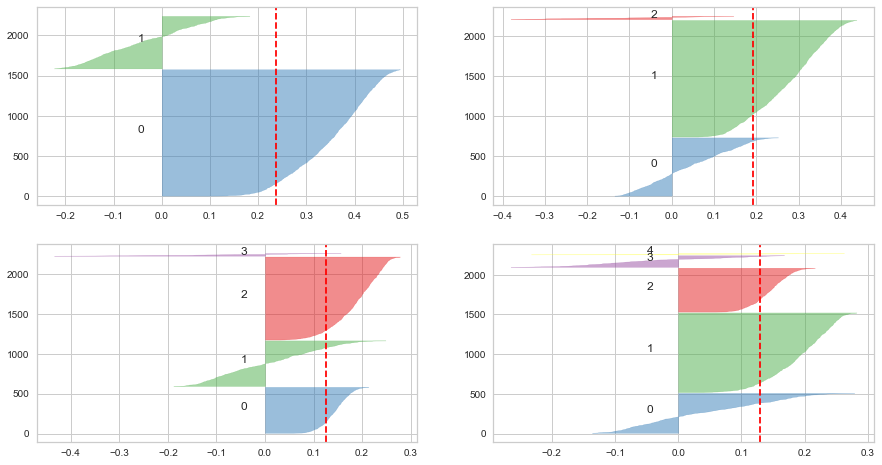

In [143]:
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    kmean_als = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(kmean_als, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(norm_als_data)

## Step 4: Use the plot created in (3) to choose on optimal number of clusters for K-means. Justify your choice.

As seen above the value seen for the n_clusters for 4 and 5 are the top two that I can see. As 4 has two that have an above average silhouette scores. While 5 has thee that have an above average and one below. Due to this I will select the optimal number of cluster to be 5.

## Step 5: Fit a K-means model to the data with the optimal number of clusters chosen in part (4).

In [144]:
# I will first set kmeans clustering 
kmeans = KMeans(5)
kmeans.fit(norm_als_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [145]:
# Next I will identify my cluster results
als_clusters = kmeans.fit_predict(norm_als_data)
als_clusters

array([4, 4, 3, ..., 3, 3, 1], dtype=int32)

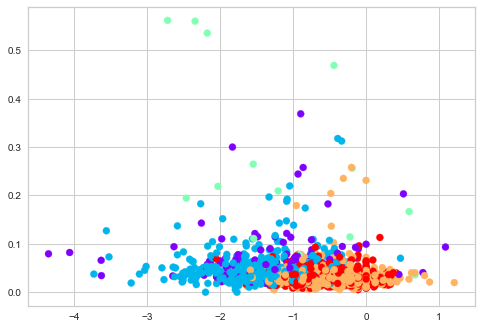

In [146]:
clusters_als = als_data.copy()
clusters_als['Clusters'] = als_clusters 
plt.scatter(clusters_als['ALSFRS_slope'],clusters_als['Hemoglobin_range'],c=clusters_als['Clusters'],cmap='rainbow')

## Step 6: Fit a PCA transformation with two features to the scaled data.

In [147]:
# First I will use PCA and pass the two components while fitting 
# my data
from sklearn.decomposition import PCA
als_pca = PCA(n_components=2)
als_fit_data = als_pca.fit_transform(updated_als_data)

In [148]:
# Next I will create my data frame will have two principal components for my als data
als_dataset = pd.DataFrame(data = als_fit_data
                           , columns = ['als component 1', 'als component 2'])

In [149]:
# I will use tails to use my new data frame 
als_dataset.tail()

,als component 1,als component 2
2218,134.004710,0.131854
2219,-155.995277,0.615603
2220,906.004721,2.118617
2221,-124.995581,-0.836433
2222,-478.996144,-1.778309


In [150]:
# I will now print the variance ratio for my als data 
# through the use of explained_variance_ratio
print('Variation per ALS Principal Component: {}'.format(als_pca.explained_variance_ratio_))

Variation per ALS Principal Component: [9.99991439e-01 5.14722633e-06]


As seen above we see that als component 1 contains 9.99% while als component 2 contains 5.13% of the imformation. meaning when we project a 30 dimensional data to a  two dimensional data we lose 85.88% of the data.

## Step 7: Make a scatterplot the PCA transformed data coloring each point by its cluster value.

In [124]:
pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 16.9 MB/s eta 0:00:0000:0100:01
You should consider upgrading via the '/Users/Robyn/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [155]:
import plotly.express as px
from sklearn.decomposition import PCA

X = updated_als_data[['Hemoglobin_range', 'ALSFRS_slope']]
fig = px.scatter(als_fit_data, x=0, y=1, color=updated_als_data['Gender_mean'])
fig.show()

As seen above the PCA scatter plot shows males to be slightly higher than females throughout the scatter plot

## Step 8: Summarize your results and make a conclusion

The Silhouetter Score came back as 0.19.2% which was used to create a n_clusters plot that showed me that the 4 and 5 are the top two with five being my overall choice as 5 has thee that have an above average and one below. When reviewing my results I have determined that males rates are slightly higher than females as seen above in the scatterplot of the PCA transformed data. Which showed me that males are more likely to have ALS compared to females. Also the variables that idciated a match in regards to ALS was the ALSFRS_slope as this variable when low is a definit cause for ALS.